# Data Visualisation

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
bias = 100
X , y, coef = make_regression(n_features=1,bias=bias,random_state=42,coef=True,noise=10)
# coef -> slope

In [4]:
X.shape , y.shape

((100, 1), (100,))

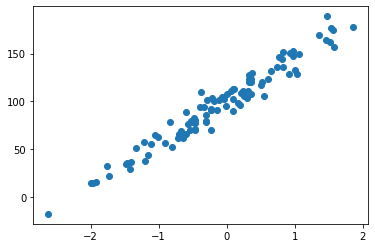

In [5]:

plt.scatter(X,y)

In [6]:
coef,bias # I have m and c from sklearn

(array(41.74110031), 100)

In [7]:
y_gen = X*coef + bias # y = mx + c

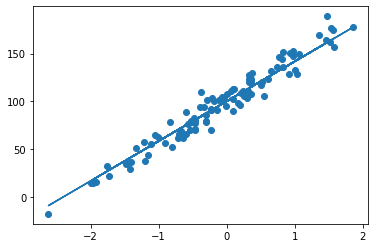

In [8]:
plt.scatter(X,y)
plt.plot(X,y_gen) 

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
model.fit(X,y)
# work during training -> figuring out coef(m) and intercept(c) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.coef_ , model.intercept_

(array([44.43716999]), 101.16511532052698)

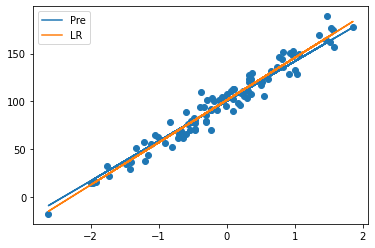

In [13]:
#Using LR model
plt.scatter(X,y)
plt.plot(X,y_gen,label = "Pre")
plt.plot(X,model.predict(X),label = "LR")
plt.legend()

In [14]:
class LinearRegCustom:
  #constructor
  def __init__ (self,lr=0.1):
    self.lr = lr

  # triaining function i.e fit
  def fit (self,X,y) :
    self._X = X # X mock behavior like private
    self._y = y.reshape(-1,1) # do calculations , else will give error due to some numy shape

    # need to figure out value of coef and intercept
    # Step1: pick these values at random 
    self.coef_ = np.random.random()
    self.intercept_ = np.random.random()

    # gradient descent
    errors =[]

    # we do this 50 times
    for i in range(50):
      self.gradient_descent()
      errors.append(self.error())
    return errors

  def gradient_descent(self):
    #change in coef and intercept
    d_coef , d_intercept = self.gradient()
    self.coef_ -= d_coef*self.lr
    self.intercept_ -= d_intercept*self.lr    

  def gradient(self):
    yh = self.predict(self._X) # from predict function
    d_coef = ((yh-self._y)*self._X).mean()
    d_intercept = (yh - self._y).mean()

    return d_coef , d_intercept

  def predict(self,X):
    return X*self.coef_ + self.intercept_

  def error(self):
    return ((self.predict(self._X)-self._y)**2).sum()

In [15]:
model = LinearRegCustom(lr = 0.12)
errors = model.fit(X,y)

In [16]:
model.coef_ , model.intercept_

(43.920672005224425, 100.82654774226967)

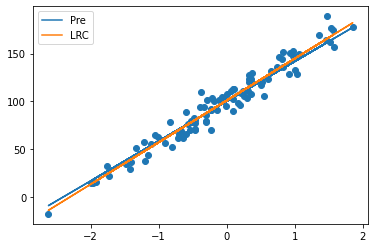

In [17]:
plt.scatter(X,y)
plt.plot(X,y_gen,label = "Pre")
plt.plot(X,model.predict(X),label = "LRC")
plt.legend()

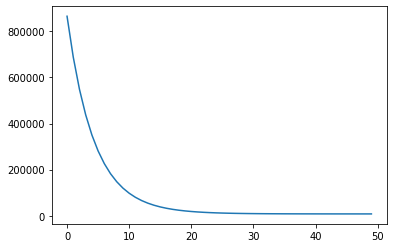

In [18]:
plt.plot(errors)

In [19]:
model.error()

7835.325989598014

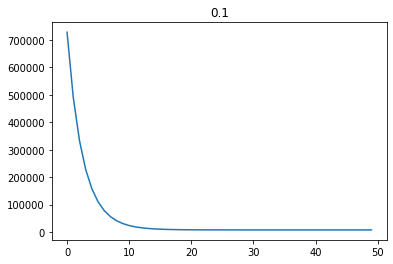

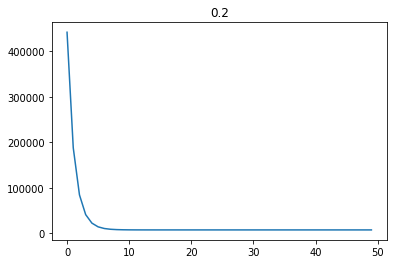

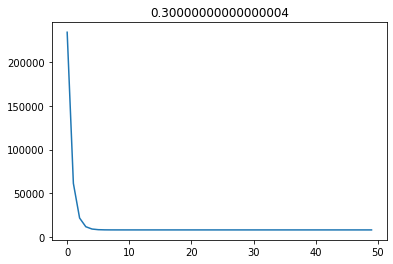

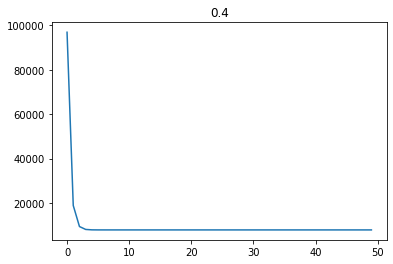

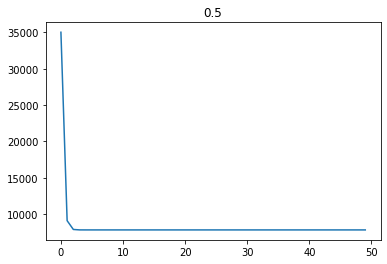

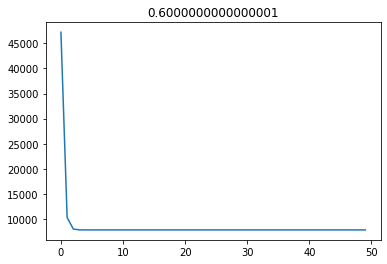

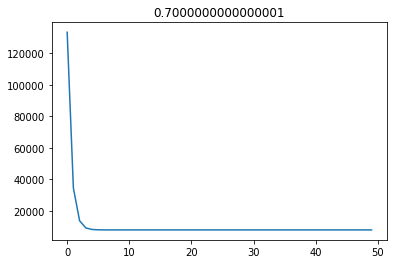

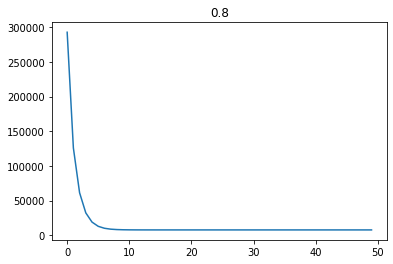

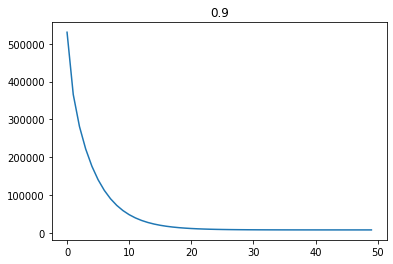

In [20]:
# visualisation of how the gradient descent is reaching local minima
for i in range(1,10):
  model = LinearRegCustom(lr=0.2*i)
  errors = model.fit(X,y)
  plt.figure()
  plt.title(str(.1*i))
  plt.plot(errors)